

<a id='Overview'></a>

# <font color='navy'>1. Importing important libraries</font>
 




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
# Set plot style
sns.set(color_codes=True)

from datetime import datetime


<a id='Overview'></a>

# <font color='navy'>2. Loading data</font>
 


In [2]:
clean_df = pd.read_csv('./clean_data_after_eda.csv')
clean_df.head(5)

Unnamed: 0                                id  \
0           0  24011ae4ebbe3035111d65fa7c15bc57   
1           1  d29c2c54acc38ff3c0614d0a653813dd   
2           2  764c75f661154dac3a6c254cd082ea7d   
3           3  bba03439a292a1e166f80264c16191cb   
4           4  149d57cf92fc41cf94415803a877cb4b   

                      channel_sales  cons_12m  cons_gas_12m  cons_last_month  \
0  foosdfpfkusacimwkcsosbicdxkicaua         0         54946                0   
1                           MISSING      4660             0                0   
2  foosdfpfkusacimwkcsosbicdxkicaua       544             0                0   
3  lmkebamcaaclubfxadlmueccxoimlema      1584             0                0   
4                           MISSING      4425             0              526   

   date_activ    date_end date_modif_prod date_renewal  ...  \
0  2013-06-15  2016-06-15      2015-11-01   2015-06-23  ...   
1  2009-08-21  2016-08-30      2009-08-21   2015-08-31  ...   
2  2010-04-16  2016-04-16      2010-04-16   2015-04-17  ...   
3  2010-03-30  2016-03-30      2010-03-30   2015-03-31  ...   
4  2010-01-13  2016-03-07      2010-01-13   2015-03-09  ...   

   mean_3m_price_p1_var  mean_3m_price_p2_var  mean_3m_price_p3_var  \
0              0.131756              0.092638              0.036909   
1              0.147600              0.000000              0.000000   
2              0.167798              0.088409              0.000000   
3              0.148586              0.000000              0.000000   
4              0.119906              0.101673              0.073719   

   mean_3m_price_p1_fix  mean_3m_price_p2_fix  mean_3m_price_p3_fix  \
0             42.497907             12.218665              8.145777   
1             44.444710              0.000000              0.000000   
2             44.444710              0.000000              0.000000   
3             44.444710              0.000000              0.000000   
4             40.728885             24.437330             16.291555   

   mean_3m_price_off_peak mean_3m_price_peak  mean_3m_price_mid_peak  churn  
0               42.629663          12.311304                8.182687      1  
1               44.592310           0.000000                0.000000      0  
2               44.612508           0.088409                0.000000      0  
3               44.593296           0.000000                0.000000      0  
4               40.848791          24.539003               16.365274      0  

[5 rows x 54 columns]

In [3]:
clean_df["date_activ"] = pd.to_datetime(clean_df["date_activ"], format='%Y-%m-%d')
clean_df["date_end"] = pd.to_datetime(clean_df["date_end"], format='%Y-%m-%d')
clean_df["date_modif_prod"] = pd.to_datetime(clean_df["date_modif_prod"], format='%Y-%m-%d')
clean_df["date_renewal"] = pd.to_datetime(clean_df["date_renewal"], format='%Y-%m-%d')

In [4]:
clean_df.drop(clean_df.columns[0],  axis=1, inplace = True)
clean_df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  mean_3m_price_p1_var  \
0      2015-11-01   2015-06-23               0.00  ...              0.131756   
1      2009-08-21   2015-08-31             189.95  ...              0.147600   
2      2010-04-16   2015-04-17              47.96  ...              0.167798   
3      2010-03-30   2015-03-31             240.04  ...              0.148586   
4      2010-01-13   2015-03-09             445.75  ...              0.119906   

   mean_3m_price_p2_var  mean_3m_price_p3_var  mean_3m_price_p1_fix  \
0              0.092638              0.036909             42.497907   
1              0.000000              0.000000             44.444710   
2              0.088409              0.000000             44.444710   
3              0.000000              0.000000             44.444710   
4              0.101673              0.073719             40.728885   

   mean_3m_price_p2_fix  mean_3m_price_p3_fix mean_3m_price_off_peak  \
0             12.218665              8.145777              42.629663   
1              0.000000              0.000000              44.592310   
2              0.000000              0.000000              44.612508   
3              0.000000              0.000000              44.593296   
4             24.437330             16.291555              40.848791   

   mean_3m_price_peak  mean_3m_price_mid_peak  churn  
0           12.311304                8.182687      1  
1            0.000000                0.000000      0  
2            0.088409                0.000000      0  
3            0.000000                0.000000      0  
4           24.539003               16.365274      0  

[5 rows x 53 columns]

<a id='Overview'></a>

# <font color='navy'>3. Feature engineering</font>
 


### Difference between off-peak prices in December and preceding January

Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

In [5]:
price_df = pd.read_csv('price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

id price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745 2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745 2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745 2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745 2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745 2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

In [6]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 
                                                                  'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1',
                                           'price_off_peak_fix': 'dec_2'}),
                jan_prices.drop(columns='price_date'), on='id')


diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

id  offpeak_diff_dec_january_energy  \
0  0002203ffbb812588b632b9e628cc38d                        -0.006192   
1  0004351ebdd665e6ee664792efc4fd13                        -0.004104   
2  0010bcc39e42b3c2131ed2ce55246e3c                         0.050443   
3  0010ee3855fdea87602a5b7aba8e42de                        -0.010018   
4  00114d74e963e47177db89bc70108537                        -0.003994   

   offpeak_diff_dec_january_power  
0                        0.162916  
1                        0.177779  
2                        1.500000  
3                        0.162916  
4                       -0.000001

In [7]:
clean_df = pd.merge(clean_df, diff, on='id')
clean_df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  mean_3m_price_p3_var  \
0      2015-11-01   2015-06-23               0.00  ...              0.036909   
1      2009-08-21   2015-08-31             189.95  ...              0.000000   
2      2010-04-16   2015-04-17              47.96  ...              0.000000   
3      2010-03-30   2015-03-31             240.04  ...              0.000000   
4      2010-01-13   2015-03-09             445.75  ...              0.073719   

   mean_3m_price_p1_fix  mean_3m_price_p2_fix  mean_3m_price_p3_fix  \
0             42.497907             12.218665              8.145777   
1             44.444710              0.000000              0.000000   
2             44.444710              0.000000              0.000000   
3             44.444710              0.000000              0.000000   
4             40.728885             24.437330             16.291555   

   mean_3m_price_off_peak  mean_3m_price_peak mean_3m_price_mid_peak  churn  \
0               42.629663           12.311304               8.182687      1   
1               44.592310            0.000000               0.000000      0   
2               44.612508            0.088409               0.000000      0   
3               44.593296            0.000000               0.000000      0   
4               40.848791           24.539003              16.365274      0   

   offpeak_diff_dec_january_energy  offpeak_diff_dec_january_power  
0                         0.020057                        3.700961  
1                        -0.003767                        0.177779  
2                        -0.004670                        0.177779  
3                        -0.004547                        0.177779  
4                        -0.006192                        0.162916  

[5 rows x 55 columns]

Looking at our data in `clean_df` so far, we can see a slight improvement in terms of granularity, an extra feature created by our collegue. However, we can further improve this idea of finding average prices over periods of times instead of finding differences in prices over those periods. Whilst our teammate created the Jan/Dec off peak price difference feature, it may possiblely reveal paatterns and trends on a very small scale, we can enahnce that by instead finding mean average prices of consistent periods of times.  

In [8]:
price_df.head(3)

id price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745 2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745 2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745 2015-03-01            0.151367   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0

### Average price changes (different consistent periods)

Building on top of our teammate's feature, computing the average prices of energy and power over certain periods of times instead of certain individual months or the entire year. This way, we can improve our collegue's feature and enhance his work.

In [9]:
mean_prices = price_df.groupby(['id']).agg({'price_off_peak_var': 'mean', 'price_peak_var': 'mean', 
                                              'price_mid_peak_var': 'mean', 'price_off_peak_fix': 'mean', 
                                              'price_peak_fix': 'mean', 'price_mid_peak_fix': 'mean'}).reset_index()

# Calculate the average difference between back-to-back periods
mean_prices['offpeak_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_peak_var']
mean_prices['peak_midpeak_var_mean_diff'] = mean_prices['price_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['offpeak_midpeak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['offpeak_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_peak_fix']
mean_prices['peak_midpeak_fix_mean_diff'] = mean_prices['price_peak_fix'] - mean_prices['price_mid_peak_fix']
mean_prices['offpeak_midpeak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_mid_peak_fix']

In [10]:
columns = ['id', 'offpeak_peak_var_mean_diff', 'peak_midpeak_var_mean_diff', 'offpeak_midpeak_var_mean_diff', 
           'offpeak_peak_fix_mean_diff', 'peak_midpeak_fix_mean_diff', 'offpeak_midpeak_fix_mean_diff']

clean_df = pd.merge(clean_df, mean_prices[columns], on='id')
clean_df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  \
0      2015-11-01   2015-06-23               0.00  ...   
1      2009-08-21   2015-08-31             189.95  ...   
2      2010-04-16   2015-04-17              47.96  ...   
3      2010-03-30   2015-03-31             240.04  ...   
4      2010-01-13   2015-03-09             445.75  ...   

   mean_3m_price_mid_peak  churn  offpeak_diff_dec_january_energy  \
0                8.182687      1                         0.020057   
1                0.000000      0                        -0.003767   
2                0.000000      0                        -0.004670   
3                0.000000      0                        -0.004547   
4               16.365274      0                        -0.006192   

   offpeak_diff_dec_january_power  offpeak_peak_var_mean_diff  \
0                        3.700961                    0.024038   
1                        0.177779                    0.142485   
2                        0.177779                    0.082090   
3                        0.177779                    0.151210   
4                        0.162916                    0.020536   

   peak_midpeak_var_mean_diff offpeak_midpeak_var_mean_diff  \
0                    0.034219                      0.058257   
1                    0.007124                      0.149609   
2                    0.088421                      0.170512   
3                    0.000000                      0.151210   
4                    0.030773                      0.051309   

   offpeak_peak_fix_mean_diff  peak_midpeak_fix_mean_diff  \
0                   18.590255                    7.450670   
1                   44.311375                    0.000000   
2                   44.385450                    0.000000   
3                   44.400265                    0.000000   
4                   16.275263                    8.137629   

   offpeak_midpeak_fix_mean_diff  
0                      26.040925  
1                      44.311375  
2                      44.385450  
3                      44.400265  
4                      24.412893  

[5 rows x 61 columns]

### Client association period

This is a feature to find out how long a customer has been a client for PowerCo. I believe that this is an important feature as I've mentioned before, I'd assume that the longer the customer has been a client for PowerCo or anny other, the lesser the chance of churning, and vice verca.

Moreover, in the previous task when performing analysis on the relationship between the number of products `nb_prod_act` a client has and churning, the results showed that there was no churning for clients with over 5 products. The reason I mention this again is that we may have a similar result when creating this feature. 

In [11]:
clean_df['association'] = ((clean_df['date_end'] - clean_df['date_activ'])/ np.timedelta64(1, 'Y')).astype(int)
clean_df.groupby(['association']).agg({'churn': 'mean'}).sort_values(by='churn', ascending=True)

churn
association          
10           0.020000
9            0.024096
8            0.048000
11           0.063584
7            0.073394
6            0.080713
12           0.083333
5            0.085425
13           0.095238
4            0.125756
2            0.133080
3            0.143836

As the results show, overall, the longer the client stays with PowerCo, the lesser chance of them churning. The table demonstrates that an association period (period of being a client to PowerCo); 5 months of client association and up are periods were clients are less likely to churn compared to 4 months and below. In brief, if PowerCo succeeds in retaining a client for 4 months and over, there is a lesser chance of that client to leave.  

In [12]:
clean_df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  churn  \
0      2015-11-01   2015-06-23               0.00  ...      1   
1      2009-08-21   2015-08-31             189.95  ...      0   
2      2010-04-16   2015-04-17              47.96  ...      0   
3      2010-03-30   2015-03-31             240.04  ...      0   
4      2010-01-13   2015-03-09             445.75  ...      0   

   offpeak_diff_dec_january_energy  offpeak_diff_dec_january_power  \
0                         0.020057                        3.700961   
1                        -0.003767                        0.177779   
2                        -0.004670                        0.177779   
3                        -0.004547                        0.177779   
4                        -0.006192                        0.162916   

   offpeak_peak_var_mean_diff  peak_midpeak_var_mean_diff  \
0                    0.024038                    0.034219   
1                    0.142485                    0.007124   
2                    0.082090                    0.088421   
3                    0.151210                    0.000000   
4                    0.020536                    0.030773   

   offpeak_midpeak_var_mean_diff offpeak_peak_fix_mean_diff  \
0                       0.058257                  18.590255   
1                       0.149609                  44.311375   
2                       0.170512                  44.385450   
3                       0.151210                  44.400265   
4                       0.051309                  16.275263   

   peak_midpeak_fix_mean_diff  offpeak_midpeak_fix_mean_diff  association  
0                    7.450670                      26.040925            3  
1                    0.000000                      44.311375            7  
2                    0.000000                      44.385450            6  
3                    0.000000                      44.400265            6  
4                    8.137629                      24.412893            6  

[5 rows x 62 columns]

## Data transformation for modelling

A very key step in data modelling is data transformation. Transforming and converting data in appropiate figures, formats, and numbers. 

* We have a number of 'date' columns in a string format, this is an issue for us when creating our predictive model. One, a predictive model can't accept strings such as the date columns we have, and also cannot accept date type columns. Thus, we'll need to convert it in a suitable and beneficial way to help us with the predictive model.
<br>
* We need to figure out what columns should be dropped from the modelling, as we most likely won't need every column from the dataset, this can be helpful in terms of model accuracy and precision.   
<br>

* As mentioned above, predictive modelling cannot accept strings. Therefore, we need to address columns such as channel_sales,  origin_up, etc.   
<br>
* Numerical columns/ features that were highly skewed may have an effect on the predicitve model, thus it is better if the skewness is addressed. I'll perform more research on this topic, as there are many questions to be answered. 
<br>

* Columns such as has_gas are considered categorical, and predictive models do not accept categorical features. Therefore, we need to transform data such as has_gas into appropiate and accurate forms. In other words, we need to find a way to convert such columns into numerics without losing meaning and value of those features. 

In [13]:
#Set the df display to max to allow us view the data of has_gas
pd.set_option('display.max_columns', None)

In [14]:
clean_df.has_gas = clean_df.has_gas.replace({'t': 1, 'f': 0})
clean_df.head(3)

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   

  date_modif_prod date_renewal  forecast_cons_12m  forecast_cons_year  \
0      2015-11-01   2015-06-23               0.00                   0   
1      2009-08-21   2015-08-31             189.95                   0   
2      2010-04-16   2015-04-17              47.96                   0   

   forecast_discount_energy  forecast_meter_rent_12m  \
0                       0.0                     1.78   
1                       0.0                    16.27   
2                       0.0                    38.72   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   
2                        0.165794                    0.087899   

   forecast_price_pow_off_peak  has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701        1       0.0                 25.44   
1                    44.311378        0       0.0                 16.38   
2                    44.311378        0       0.0                 28.60   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
0               25.44            2      678.99                3   
1               16.38            1       18.89                6   
2               28.60            1        6.60                6   

                          origin_up  pow_max  mean_year_price_p1_var  \
0  lxidpiddsbxsbosboudacockeimpuepw   43.648                0.124787   
1  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800                0.149609   
2  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856                0.170512   

   mean_year_price_p2_var  mean_year_price_p3_var  mean_year_price_p1_fix  \
0                0.100749                 0.06653               40.942265   
1                0.007124                 0.00000               44.311375   
2                0.088421                 0.00000               44.385450   

   mean_year_price_p2_fix  mean_year_price_p3_fix  mean_year_price_off_peak  \
0                22.35201                14.90134                 41.067053   
1                 0.00000                 0.00000                 44.460984   
2                 0.00000                 0.00000                 44.555962   

   mean_year_price_peak  mean_year_price_mid_peak  mean_6m_price_p1_var  \
0             22.452760                 14.967871              0.123598   
1              0.007124                  0.000000              0.147851   
2              0.088421                  0.000000              0.168569   

   mean_6m_price_p2_var  mean_6m_price_p3_var  mean_6m_price_p1_fix  \
0              0.098104              0.061525             41.318559   
1              0.014247              0.000000             44.355820   
2              0.088535              0.000000             44.444710   

   mean_6m_price_p2_fix  mean_6m_price_p3_fix  mean_6m_price_off_peak  \
0             20.364442             13.576296               41.442157   
1              0.000000              0.000000               44.503671   
2              0.000000              0.000000               44.613279   

   mean_6m_price_peak  mean_6m_price_mid_peak  mean_3m_price_p1_var  \
0           20.462545               13.637821              0.131756   
1            0.014247                0.000000              0.147600   
2            0.088535                0.000000              0.167798   

   mean_3m_price_p2_var  mean_3m_price_

In [15]:
# Transform channel_sales into categorical type
clean_df['channel_sales'] = clean_df['channel_sales'].astype('category')
clean_df['channel_sales'].value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    6753
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

As the results above show, there are 8 different channel sales, in which there are 3 of them with a count of 11 and less. These numbers are very little compared to the top 5, since there is a huge hap between a count of 893 and 11. Thus we'll drop those last 3 since they won't have much positive effect. 

In [16]:
clean_df = pd.get_dummies(clean_df, columns=['channel_sales'], prefix='channel')
clean_df = clean_df.drop(columns=['channel_fixdbufsefwooaasfcxdxadsiekoceaa',
                                  'channel_epumfxlbckeskwekxbiuasklxalciiuu',
                                  'channel_sddiedcslfslkckwlfkdpoeeailfpeds'])
clean_df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  d29c2c54acc38ff3c0614d0a653813dd      4660             0                0   
2  764c75f661154dac3a6c254cd082ea7d       544             0                0   
3  bba03439a292a1e166f80264c16191cb      1584             0                0   
4  149d57cf92fc41cf94415803a877cb4b      4425             0              526   

  date_activ   date_end date_modif_prod date_renewal  forecast_cons_12m  \
0 2013-06-15 2016-06-15      2015-11-01   2015-06-23               0.00   
1 2009-08-21 2016-08-30      2009-08-21   2015-08-31             189.95   
2 2010-04-16 2016-04-16      2010-04-16   2015-04-17              47.96   
3 2010-03-30 2016-03-30      2010-03-30   2015-03-31             240.04   
4 2010-01-13 2016-03-07      2010-01-13   2015-03-09             445.75   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0                   0                       0.0                     1.78   
1                   0                       0.0                    16.27   
2                   0                       0.0                    38.72   
3                   0                       0.0                    19.83   
4                 526                       0.0                   131.73   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   
2                        0.165794                    0.087899   
3                        0.146694                    0.000000   
4                        0.116900                    0.100015   

   forecast_price_pow_off_peak  has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701        1      0.00                 25.44   
1                    44.311378        0      0.00                 16.38   
2                    44.311378        0      0.00                 28.60   
3                    44.311378        0      0.00                 30.22   
4                    40.606701        0     52.32                 44.91   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
0               25.44            2      678.99                3   
1               16.38            1       18.89                6   
2               28.60            1        6.60                6   
3               30.22            1       25.46                6   
4               44.91            1       47.98                6   

                          origin_up  pow_max  mean_year_price_p1_var  \
0  lxidpiddsbxsbosboudacockeimpuepw   43.648                0.124787   
1  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800                0.149609   
2  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856                0.170512   
3  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.200                0.151210   
4  kamkkxfxxuwbdslkwifmmcsiusiuosws   19.800                0.124174   

   mean_year_price_p2_var  mean_year_price_p3_var  mean_year_price_p1_fix  \
0                0.100749                0.066530               40.942265   
1                0.007124                0.000000               44.311375   
2                0.088421                0.000000               44.385450   
3                0.000000                0.000000               44.400265   
4                0.103638                0.072865               40.688156   

   mean_year_price_p2_fix  mean_year_price_p3_fix  mean_year_price_off_peak  \
0               22.352010               14.901340                 41.067053   
1                0.000000                0.000000                 44.460984   
2                0.000000                0.000000                 44.555962   
3                0.000000                0.000000                 44.551475   
4               24.412893               16.275263                 40.812330   

   mean_year_price_peak  mea

In [17]:
clean_df['origin_up'] = clean_df['origin_up'].astype('category')

print("Count:\n")
clean_df['origin_up'].value_counts()

Count:



lxidpiddsbxsbosboudacockeimpuepw    7096
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64

Again, as the above count shows, there are 3 values with a count of 64 and less, which are insignificant when compared to a count of 3100 and above. Therefore, those 3 values will be dropped.

In [18]:
clean_df = pd.get_dummies(clean_df, columns=['origin_up'], prefix='origin_up')
clean_df = clean_df.drop(columns=['origin_up_ewxeelcelemmiwuafmddpobolfuxioce',
                                  'origin_up_usapbepcfoloekilkwsdiboslwaxobdp',
                                  'origin_up_MISSING'])
clean_df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  d29c2c54acc38ff3c0614d0a653813dd      4660             0                0   
2  764c75f661154dac3a6c254cd082ea7d       544             0                0   
3  bba03439a292a1e166f80264c16191cb      1584             0                0   
4  149d57cf92fc41cf94415803a877cb4b      4425             0              526   

  date_activ   date_end date_modif_prod date_renewal  forecast_cons_12m  \
0 2013-06-15 2016-06-15      2015-11-01   2015-06-23               0.00   
1 2009-08-21 2016-08-30      2009-08-21   2015-08-31             189.95   
2 2010-04-16 2016-04-16      2010-04-16   2015-04-17              47.96   
3 2010-03-30 2016-03-30      2010-03-30   2015-03-31             240.04   
4 2010-01-13 2016-03-07      2010-01-13   2015-03-09             445.75   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0                   0                       0.0                     1.78   
1                   0                       0.0                    16.27   
2                   0                       0.0                    38.72   
3                   0                       0.0                    19.83   
4                 526                       0.0                   131.73   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   
2                        0.165794                    0.087899   
3                        0.146694                    0.000000   
4                        0.116900                    0.100015   

   forecast_price_pow_off_peak  has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701        1      0.00                 25.44   
1                    44.311378        0      0.00                 16.38   
2                    44.311378        0      0.00                 28.60   
3                    44.311378        0      0.00                 30.22   
4                    40.606701        0     52.32                 44.91   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  pow_max  \
0               25.44            2      678.99                3   43.648   
1               16.38            1       18.89                6   13.800   
2               28.60            1        6.60                6   13.856   
3               30.22            1       25.46                6   13.200   
4               44.91            1       47.98                6   19.800   

   mean_year_price_p1_var  mean_year_price_p2_var  mean_year_price_p3_var  \
0                0.124787                0.100749                0.066530   
1                0.149609                0.007124                0.000000   
2                0.170512                0.088421                0.000000   
3                0.151210                0.000000                0.000000   
4                0.124174                0.103638                0.072865   

   mean_year_price_p1_fix  mean_year_price_p2_fix  mean_year_price_p3_fix  \
0               40.942265               22.352010               14.901340   
1               44.311375                0.000000                0.000000   
2               44.385450                0.000000                0.000000   
3               44.400265                0.000000                0.000000   
4               40.688156               24.412893               16.275263   

   mean_year_price_off_peak  mean_year_price_peak  mean_year_price_mid_peak  \
0                 41.067053             22.452760                 14.967871   
1                 44.460984              0.007124                  0.000000   
2                 44.555962              0.088421                  0.000000   
3                 44.551475              0.000000                  0.000000   
4                 40.812

In [19]:
# a good reference would be a central point. 
reference_date = datetime(2016, 1, 1)

clean_df['months_activ']  = ((reference_date - clean_df['date_activ']) / np.timedelta64(1, 'M')).astype(int)
clean_df['months_to_end'] = -((reference_date - clean_df['date_end']) / np.timedelta64(1, 'M')).astype(int)
clean_df['months_renewal'] =((reference_date - clean_df['date_renewal']) / np.timedelta64(1, 'M')).astype(int)
clean_df['months_modif_prod'] = ((reference_date - clean_df['date_modif_prod']) / np.timedelta64(1, 'M')).astype(int)

Now that we have new columns with the number of months between them and a constant date that's of the next new year. This way, we have made great use of the date columns, in which we can later use in the predictive model. 

In [20]:
remove = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']
clean_df = clean_df.drop(columns=remove)
clean_df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  d29c2c54acc38ff3c0614d0a653813dd      4660             0                0   
2  764c75f661154dac3a6c254cd082ea7d       544             0                0   
3  bba03439a292a1e166f80264c16191cb      1584             0                0   
4  149d57cf92fc41cf94415803a877cb4b      4425             0              526   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0               0.00                   0                       0.0   
1             189.95                   0                       0.0   
2              47.96                   0                       0.0   
3             240.04                   0                       0.0   
4             445.75                 526                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                     1.78                        0.114481   
1                    16.27                        0.145711   
2                    38.72                        0.165794   
3                    19.83                        0.146694   
4                   131.73                        0.116900   

   forecast_price_energy_peak  forecast_price_pow_off_peak  has_gas  imp_cons  \
0                    0.098142                    40.606701        1      0.00   
1                    0.000000                    44.311378        0      0.00   
2                    0.087899                    44.311378        0      0.00   
3                    0.000000                    44.311378        0      0.00   
4                    0.100015                    40.606701        0     52.32   

   margin_gross_pow_ele  margin_net_pow_ele  nb_prod_act  net_margin  \
0                 25.44               25.44            2      678.99   
1                 16.38               16.38            1       18.89   
2                 28.60               28.60            1        6.60   
3                 30.22               30.22            1       25.46   
4                 44.91               44.91            1       47.98   

   num_years_antig  pow_max  mean_year_price_p1_var  mean_year_price_p2_var  \
0                3   43.648                0.124787                0.100749   
1                6   13.800                0.149609                0.007124   
2                6   13.856                0.170512                0.088421   
3                6   13.200                0.151210                0.000000   
4                6   19.800                0.124174                0.103638   

   mean_year_price_p3_var  mean_year_price_p1_fix  mean_year_price_p2_fix  \
0                0.066530               40.942265               22.352010   
1                0.000000               44.311375                0.000000   
2                0.000000               44.385450                0.000000   
3                0.000000               44.400265                0.000000   
4                0.072865               40.688156               24.412893   

   mean_year_price_p3_fix  mean_year_price_off_peak  mean_year_price_peak  \
0               14.901340                 41.067053             22.452760   
1                0.000000                 44.460984              0.007124   
2                0.000000                 44.555962              0.088421   
3                0.000000                 44.551475              0.000000   
4               16.275263                 40.812330             24.516531   

   mean_year_price_mid_peak  mean_6m_price_p1_var  mean_6m_price_p2_var  \
0                 14.967871              0.123598              0.098104   
1                  0.000000              0.147851              0.014247   
2                  0.000000              0.168569              0.088535   
3                  0.000000              0.149330              0.000000   
4                 16.348129              0.121266             

In [21]:
clean_df.head(50)

id  cons_12m  cons_gas_12m  cons_last_month  \
0   24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1   d29c2c54acc38ff3c0614d0a653813dd      4660             0                0   
2   764c75f661154dac3a6c254cd082ea7d       544             0                0   
3   bba03439a292a1e166f80264c16191cb      1584             0                0   
4   149d57cf92fc41cf94415803a877cb4b      4425             0              526   
5   1aa498825382410b098937d65c4ec26d      8302             0             1998   
6   7ab4bf4878d8f7661dfc20e9b8e18011     45097             0                0   
7   01495c955be7ec5e7f3203406785aae0     29552             0             1260   
8   f53a254b1115634330c12c7fdbf7958a      2962             0                0   
9   10c1b2f97a2d2a6f10299dc213d1a370     26064             0             2188   
10  d5e512dbc8118a830a7b8c7f61d89992     10831             0             3112   
11  6ee77a019251bcc304c88167e0dfcb4c      4442             0             2489   
12  2c05848e1a577dd041ea6804bbf5bbf5     46121       1542867             5280   
13  21860c2ff2d5df75503b230ce629c253      7726             0                0   
14  c5037389dd8be351d3c40f2973da2391      9707             0                0   
15  e4773b60d2e68aac94795782abfc006b     47019             0             3161   
16  bd14bbac3aca710ee5288fcd8511d4bb    786536         80583            85883   
17  4e4a34a6d91ff25d0fdf68733907ad44     30776             0                0   
18  f2b93783adecf0d0d8d60ab547bda3de     24838             0             2877   
19  47e976c5d7f1ee1fee6d60ca39fd0218     15411             0                0   
20  db6ac41fb6972374f28bc6f8e43b9764     16782             0             1908   
21  bee0c7e972180fbee50c2ea15b12965c     26987             0             4099   
22  78014630fbac3e6aa980361d25cea748     20560             0             3804   
23  5789c446141a44a9b405db35682f6eb5     12157             0                0   
24  ed5bc499fecb8eee257857fd286ebd65     13122             0                0   
25  389bbbe70248fbeecdf9bb1bd0d1da04      3584             0              322   
26  31615bef53242dfedeaf275214044ca1      2632             0                0   
27  74ff037708f036de5745ce34d8d9d4df      4792             0                0   
28  7287dad2f1f535d03435ea7c78b557c4      7950             0             1100   
29  26c7bba7d51f86a16109de505bcd4f52   1856956         41883           164355   
30  44e826a55734d0ca5eeafcae0e991a75       324             0                0   
31  4bffd9d74bfb770ef7763e8e4e88dfc3      2103             0                0   
32  2d9d0546d83c60ed3d5728d744d65c40     19593             0                0   
33  79d29481ee261caf08387bcef9e4346d     41814             0             4159   
34  044d071a5dbc2668cddad4f2b28c91d1     37969             0             3407   
35  af87b64523cf1f4f4a681e2cc44c8629     41214             0             3538   
36  9403f3f9ff06ec9e49db8255ede2b098   2012791             0           218619   
37  51a7edcf29ed04830da6b3ee79f9e508     20429             0                0   
38  d9260de11c54a215fa7363f603bbeaf6      5957             0              794   
39  a853b52e3992aa2df0870fe42d843a65      6047             0                0   
40  91607f6e0ed7143ab1a5b2abc20f1c00   1938393             0           312684   
41  757ea31873662fe77d60e8c4f736a1ec      9141             0             1592   
42  d53f9011d82ed1f4850d0d312d04468b      4259             0                0   
43  af47b8ea9a596c200ee39128a95738f9     12199             0                0   
44  f8943edfeb1783f3793d3abc6305c1e3     13859             0                0   
45  adfec8a906dfa5c6d836231e65825539    110534             0             7546   
46  34f2d4431b7db25cd660b098acf3d3a0     79090             0             3319   
47  cdcc2c363d5b34232082cee78776e59e      5162             0                0   
48  b96aa3a8655203318c6b853dbdb0ceb7     88178             0     

### Update on correlation between features

In [22]:
len(clean_df.columns)

68

Now that we have created more features, we can only hope that there is some sort of correlation between them and churning. Now we have 67 features in total (excluding id). These features don't mean that there is a very high correlation with churn, but we can hope that there is correlation to some extent at least. We can view the results later and come back and adjust current features or create better ones. 

C:\Users\Hamad\AppData\Local\Temp\ipykernel_33604\1462674922.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = clean_df.corr()


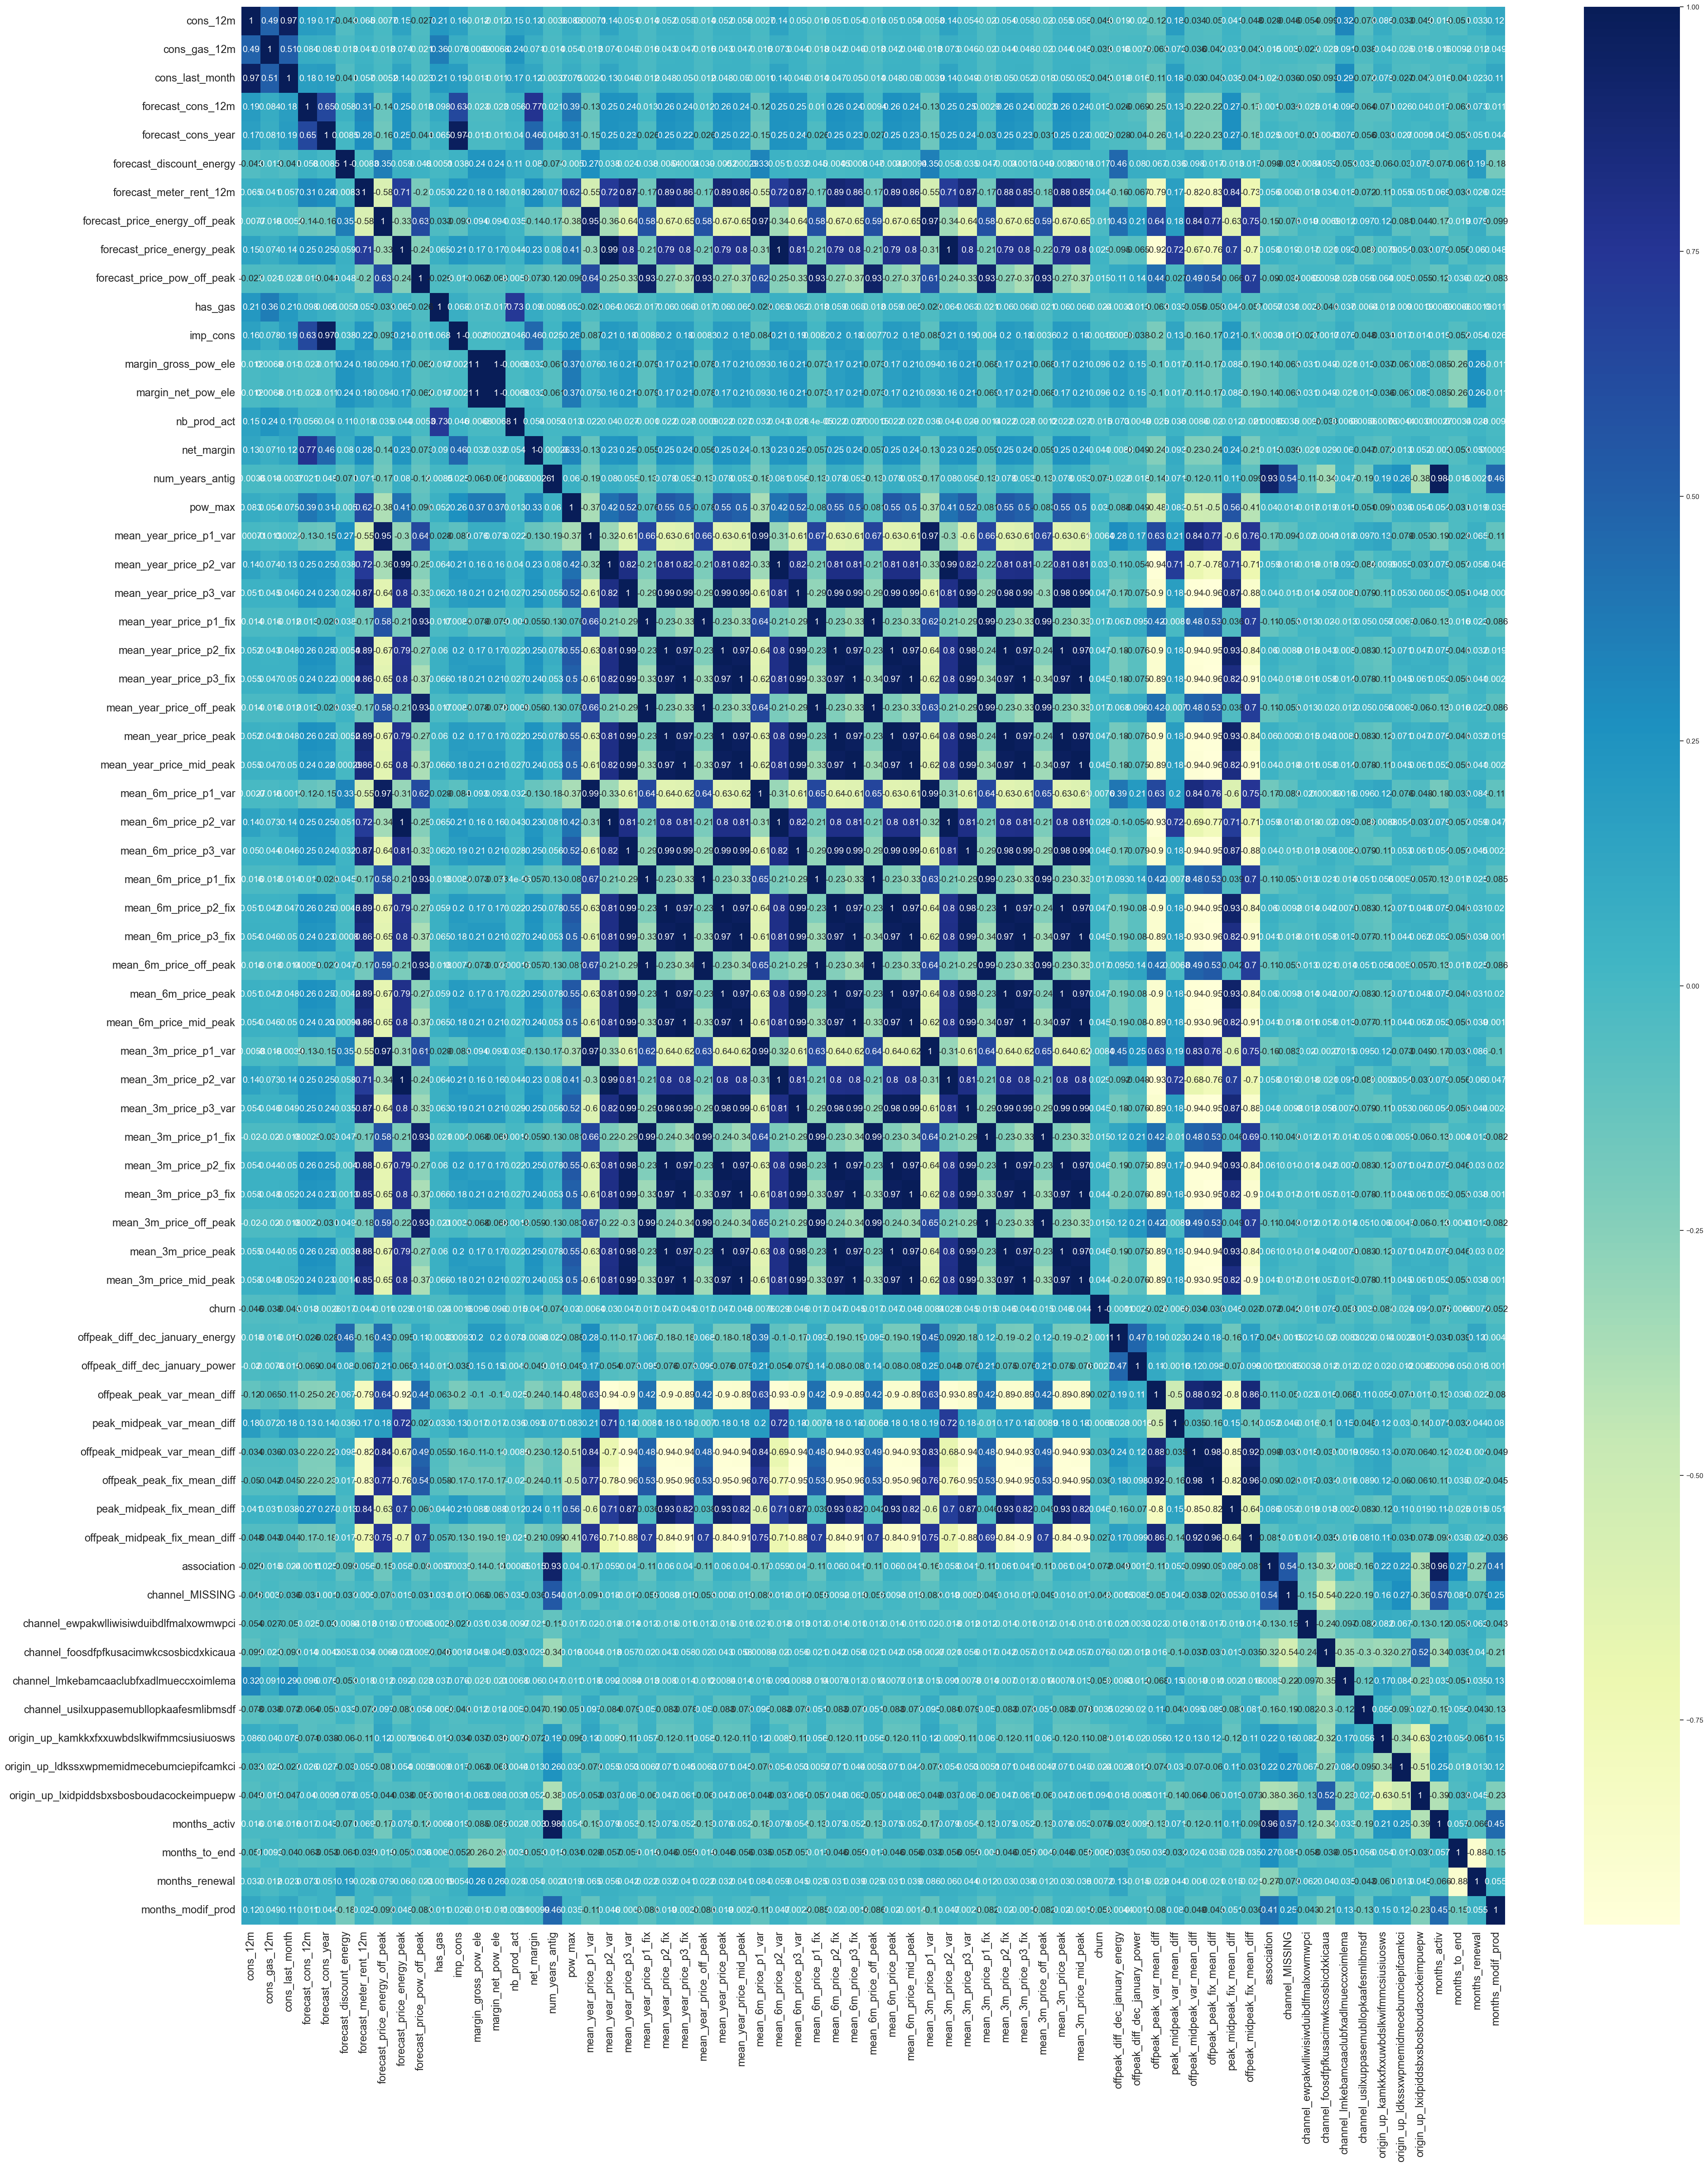

In [23]:
corr = clean_df.corr()

plt.figure(figsize=(45, 55))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True,
            annot_kws={'size': 14}, cmap='YlGnBu'
)

plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.show()

<a id='Overview'></a>

# <font color='navy'>4. Random Forest Classifier Predictive Model (RFC)</font>
 

### Definition & Data Sampling

The prediction process in a tree is composed of a sequence of comparisons of the sample’s attributes (features) with pre-learned threshold values. Starting from the top (the root of the tree) and going downward (toward the leaves, yes, opposite to real-life trees), in each step the result of the comparison determines if the sample goes left or right in the tree, and by that — determines the next comparison step. When our sample reaches a leaf (an end node) — the decision, or prediction, is made, based on the majority class in the leaf.

A Random Forest Classifier is an ensemble learning method used in classification as well as regression, it works by creating many decision trees at training time. It simply uses averaging to imporve model's predictive accuracy and precision. The reason it is called a Forest is due to the fact that it consists of a collection of Decision Trees, which are tree-based algorithms. 



<br>

But first, how does a decision tree work? In simple words, the prediction process of the decision tree consists of a sequence of comparisons of the provided sample data, and it will compare the sample's features with pre-learned values. It starts top-down, root to leaf, and in every step downward, a comparison happens, and the result of that comparison decides if the sample right or left in the tree, in which also the next step is decided, and the cycle keeps going until the sample reaches a leaf or an end node, a prediction/ decision is made. 


<br>
Now unlike a single decsion tree, an RFC (which is ensemble based) consists of many decision trees. So, instead of relying on one decision tree, we can have 100 or even 1000 decision trees. This is powerful, this is due to the fact that those different decision trees will be using different splits of the data, which means recognizing different patterns, results and conclusions. Now ensemble concludes in 2 ways, one is by taking a voting approach on deciding which prediction is best, second is by averaging. 

<br>
The data should be split into training and testing samples. In this case, I'll first use a split of 70-30 percent traning and testing respectively, the usual range for such is between 20 and 30 for testing (75-25 is most common). 

In [24]:
train_df = clean_df.copy()

# Separate the target variable from tthe independent ones
X = clean_df.drop(columns=['id', 'churn'])
y = clean_df['churn']

In [25]:
X

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0             0         54946                0               0.00   
1          4660             0                0             189.95   
2           544             0                0              47.96   
3          1584             0                0             240.04   
4          4425             0              526             445.75   
...         ...           ...              ...                ...   
14600     32270         47940                0            4648.01   
14601      7223             0              181             631.69   
14602      1844             0              179             190.39   
14603       131             0                0              19.34   
14604      8730             0                0             762.41   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0                       0                       0.0                     1.78   
1                       0                       0.0                    16.27   
2                       0                       0.0                    38.72   
3                       0                       0.0                    19.83   
4                     526                       0.0                   131.73   
...                   ...                       ...                      ...   
14600                   0                       0.0                    18.57   
14601                 181                       0.0                   144.03   
14602                 179                       0.0                   129.60   
14603                   0                       0.0                     7.18   
14604                   0                       0.0                     1.07   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                            0.114481                    0.098142   
1                            0.145711                    0.000000   
2                            0.165794                    0.087899   
3                            0.146694                    0.000000   
4                            0.116900                    0.100015   
...                               ...                         ...   
14600                        0.138305                    0.000000   
14601                        0.100167                    0.091892   
14602                        0.116900                    0.100015   
14603                        0.145711                    0.000000   
14604                        0.167086                    0.088454   

       forecast_price_pow_off_peak  has_gas  imp_cons  margin_gross_pow_ele  \
0                        40.606701        1      0.00                 25.44   
1                        44.311378        0      0.00                 16.38   
2                        44.311378        0      0.00                 28.60   
3                        44.311378        0      0.00                 30.22   
4                        40.606701        0     52.32                 44.91   
...                            ...      ...       ...                   ...   
14600                    44.311378        1      0.00                 27.88   
14601                    58.995952        0     15.94                  0.00   
14602                    40.606701        0     18.05                 39.84   
14603                    44.311378        0      0.00                 13.08   
14604                    45.311378        0      0.00                 11.84   

       margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  pow_max  \
0                   25.44            2      678.99                3   43.648   
1                   16.38            1       18.89                6   13.800   
2                   28.60            1        6.60                6   13.856   
3                   30.22            1       25.46                6   13.200   
4                   44.91            1 

In [26]:
y

0        1
1        0
2        0
3        0
4        0
        ..
14600    0
14601    1
14602    1
14603    0
14604    0
Name: churn, Length: 14605, dtype: int64

In [27]:
print(X.shape)
print(y.shape)

(14605, 66)
(14605,)


In [28]:
## Split data into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [29]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10223, 66)
(10223,)
(4382, 66)
(4382,)


In [30]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 0)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=0)

In [31]:
## prediction of test data
y_pred = rf_classifier.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

<a id='Overview'></a>

# <font color='navy'>5. Model Evaluation</font>
 



Now that the prediction is done, it is time to evaluate the results and see whether this trained model can predict values accurately or not. 

I'll use 4 different key metrics to evaluate the perforamnce of the model:
<br>
>1. Accuracy: measures the proportion of True Positives. In other words, the ratio of positively predicted values to the total set.
>2. Precision: measure the model's cabability of not identifying a negative sample as positive.  
>3. Recall: measures model's capability on finding all true positives. 
>4. K-fold Cross Validation: gives an assessment or estimate on how these results will generalize to an independent dataset. 

<br>
These are all key metrics needed for evaluation, there are more metrics as well, but these are enough to evaluate our model. Also note that we haven't just used one metric (didn't rely on accuracy only), this is because the result we get for accuracy is not always a good measure or indicator to use. Thus, I've included Recall, Precision which are important, as well as K-Fold CV.

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score


In [33]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score: ", accuracy)
print("\nClassification Report\n")
print(classification_report(y_test, y_pred))

Accuracy score:  0.8993610223642172

Classification Report

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3925
           1       0.86      0.04      0.08       457

    accuracy                           0.90      4382
   macro avg       0.88      0.52      0.51      4382
weighted avg       0.90      0.90      0.86      4382



In [34]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[3922    3]
 [ 438   19]]


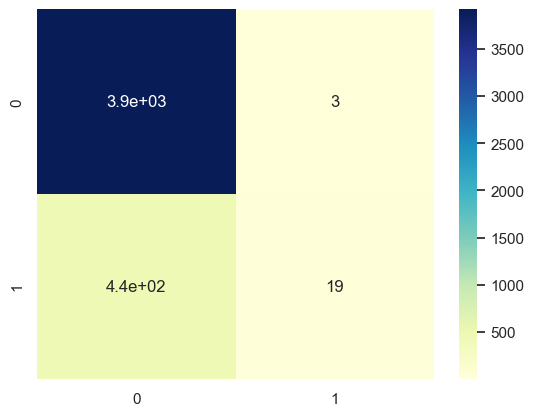

In [35]:
sns.heatmap(cm, annot=True,cmap='YlGnBu' )
plt.show()

In [36]:
print("Precision Score is: ", precision_score(y_test, y_pred))

Precision Score is:  0.8636363636363636


In [37]:
print("Recall Score is: ", recall_score(y_test, y_pred))


Recall Score is:  0.04157549234135667


In [38]:
print("F1 Score is: ", f1_score(y_test, y_pred))


F1 Score is:  0.07933194154488517


We'll use a k-fold of 5 (cv of 5)

In [39]:
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv = 5, scoring = 'accuracy')

print('Cross-validation scores:{}'.format(cv_scores))

Cross-validation scores:[0.91051345 0.91149144 0.91002445 0.90802348 0.90900196]


In [40]:
print('Average compelete cross-validation score: ',cv_scores.mean())
# print('Average compelete cross-validation score: ',cv_scores.mean())
print('Average cross-validation score: {:.4f}'.format(cv_scores.mean()))


Average compelete cross-validation score:  0.9098109560332824
Average cross-validation score: 0.9098


<a id='Overview'></a>

# <font color='navy'>6. Model Summary & Conclusion</font>
 




Since we have used RFC or Random Forest Classifier, we can simply retreive 'feature_importances_' from the trained model which is built-in. Feature importance In simple terms, is the weight of the feature. Meaning that the higher the score of a feature, the more impactful it will be on the model. 

The source for this section can be found 
<a href="https://mljar.com/blog/feature-importance-in-random-forest/#:~:text=Random%20Forest%20Built%2Din%20Feature%20Importance&text=It%20is%20a%20set%20of,sets%20with%20similars%20responses%20within.">Here.</a>



In [41]:
feature_importances = pd.DataFrame({'features': X_train.columns,
                                    'importance': rf_classifier.feature_importances_
                                    }).sort_values(by='importance', ascending=True).reset_index()

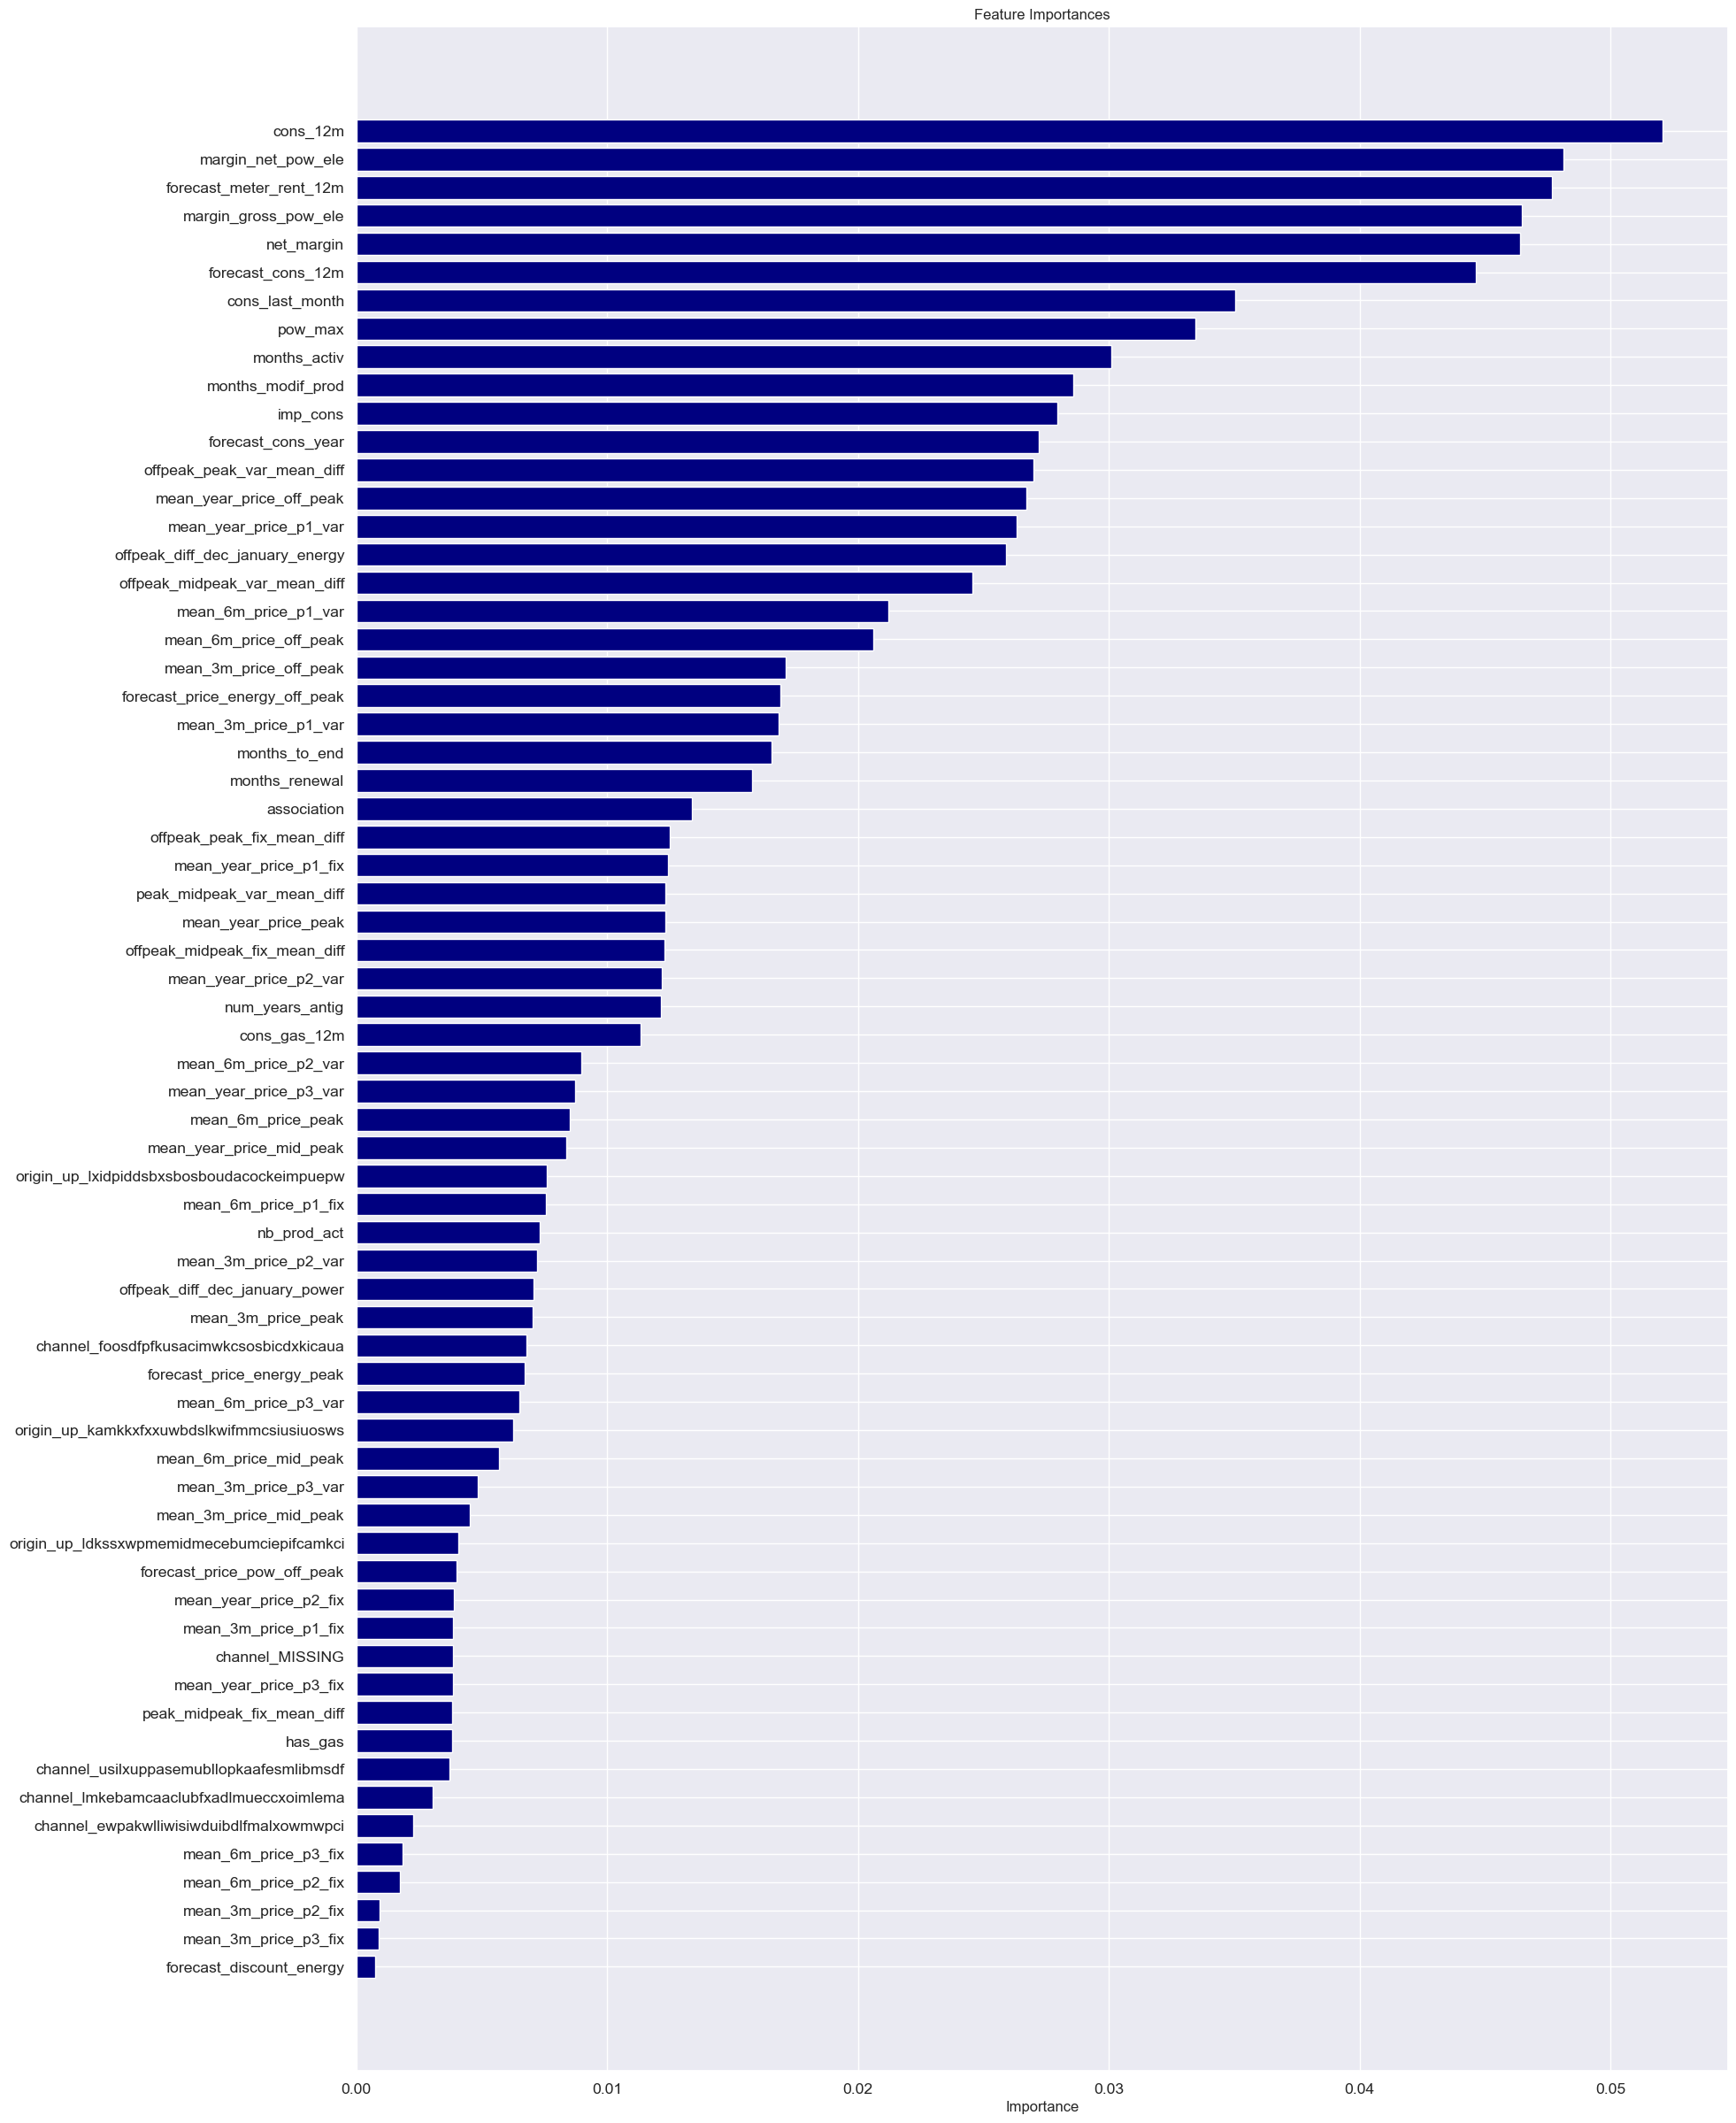

In [42]:
plt.figure(figsize=(20, 30))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color = 'navy')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.xticks(fontsize=12.7)
plt.yticks(fontsize=12.7)
plt.show()

The following is a summary of the above graph and an overall view of the results.

* Net margin on both power and energy over the past 12 months is key for churning. 
* Electricity Consumption over the past 12 months was the number 1 driver for churning in this model. 
* The forcasted bill of rental for the next 2 months seems to be a major churn driver. 
* The period of Association seems to be have some sort of influence on chruning.
* The feature created by our teammate seems to have significant influence on customer churn. 
* The number of months a client is active seems to be one of the main drivers for churn. 

However, it seems that most of the new features that targeted price senstivity do not seem to have a major influence on customer churning. Going back to our main question and hypothesis, "Is customers' churn due to price sensitivity?", and based on the results we've had so far, it seems that price sensitivity has a weak influece and contribution to churning. 

This also brings a question to the recommendation of providing 20% to customers. If price sensitivity is not the main contributor to the churn, then maybe a 20% discount more likely won't solve the problem of churning,  though it may help retain some customers, but it is not the solution. Therefore, more examination and experimentation is required to come up with a great recommendation. 
